In [1]:
from pathlib import Path
from modules.alpaca_calls import *
from modules.MCForecastTools import MCSimulation


 



Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [2]:
#import random function from rancom_csv_stock module
from modules.random_csv_stock import stock_tickers_random

In [5]:
#retrieve randcom function
random_csv_stock = stock_tickers_random()
print(random_csv_stock)

['AAL', 'MCD', 'INTC', 'VZ', 'TSLA']


In [7]:
#Print ranndom function data
rand_stock_data = retrieve_alpaca_dataframes(random_csv_stock)
print(rand_stock_data)

              AAL                                                          \
             open     high    low  close    volume trade_count       vwap   
2016-09-01  36.53  36.7100  35.88  36.24   6940639       45265  36.266989   
2016-09-02  36.00  36.7000  36.00  36.53   5429115       36243  36.521165   
2016-09-06  36.60  36.9700  36.36  36.96   5501735       33377  36.823819   
2016-09-07  37.50  39.5200  37.42  38.75  13774999       82285  38.899394   
2016-09-08  38.68  39.4100  38.43  39.35   7101532       43648  38.986038   
...           ...      ...    ...    ...       ...         ...        ...   
2022-08-25  14.16  14.4600  14.09  14.42  22167813       69170  14.335288   
2022-08-26  14.41  14.5400  13.71  13.74  23177522       72140  14.019201   
2022-08-29  13.51  13.7094  13.45  13.51  21391167       66781  13.561104   
2022-08-30  13.57  13.6800  13.20  13.33  25071569       81225  13.371212   
2022-08-31  13.50  13.5300  12.96  12.99  27914466       80760  13.172903   

In [8]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for running Monte Carlo simulation on portfolio price data.

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number of simu

In [9]:
#10 year Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear_rand = MCSimulation(
    portfolio_data = rand_stock_data,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [10]:
# Printing the simulation input data
MC_tenyear_rand.portfolio_data.head()

# Run a Monte Carlo simulation to forecast 12 years cumulative returns
MC_tenyear_rand.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\users\admin\github\portfolio-analyzer\modules\MCForecastTools.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997971,1.000413,1.036724,0.985672,1.005937,1.008540,1.011596,1.008453,0.972438,0.986130,...,1.000324,0.996920,0.990802,1.002300,0.993998,1.000890,0.999682,1.005730,1.034785,1.007165
2,0.999705,1.006182,1.036077,0.996754,0.992879,1.008285,1.003693,1.019773,0.976140,0.990127,...,1.000942,0.998992,0.996085,1.016486,0.976167,0.981781,1.014712,1.012699,1.022215,1.030572
3,0.998227,1.009874,1.038449,1.005064,0.989271,0.994076,0.997380,1.020936,0.957750,1.003194,...,0.990255,1.009191,0.991962,1.016966,0.980526,0.975935,1.026535,1.034918,1.031893,1.018403
4,1.011931,1.013634,1.033602,1.003555,1.005290,1.009496,0.998778,1.017599,0.946309,0.992005,...,1.005181,1.007641,0.968118,1.029727,0.946490,0.983599,1.027176,1.032592,1.021176,1.016616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.779807,2.473986,0.965063,1.037071,8.590570,2.183693,2.856528,1.520115,1.419529,1.885696,...,3.789758,3.088246,3.230581,0.861780,2.202385,0.339210,0.574348,1.389442,3.732352,2.338930
2517,2.794286,2.501831,0.955901,1.058496,8.587504,2.225060,2.876068,1.532672,1.449868,1.868922,...,3.816872,3.113052,3.179776,0.867475,2.172462,0.342076,0.573820,1.382825,3.759823,2.312601
2518,2.764717,2.488253,0.968238,1.053155,8.540092,2.207871,2.886997,1.528689,1.409556,1.882889,...,3.862004,3.166172,3.127069,0.854508,2.183245,0.347536,0.570445,1.378474,3.816951,2.319172
2519,2.770466,2.510532,0.985184,1.035289,8.674163,2.203138,2.877949,1.541304,1.410701,1.876229,...,3.886215,3.179268,3.156876,0.851774,2.214926,0.348414,0.580462,1.360772,3.858791,2.311377


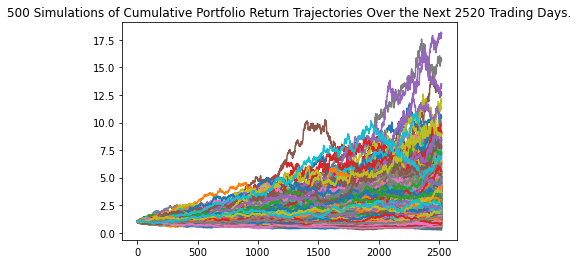

In [11]:
#Create Line Plot
MC_sim_line_plot = MC_tenyear_rand.plot_simulation()



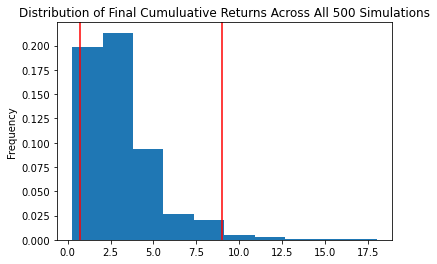

In [12]:
# Plot probability distribution and confidence intervals
MC_sim_dist_plot = MC_tenyear_rand.plot_distribution()



In [14]:
# Generate summary statiscs from the Monte Carlo simulation
# Set the sumamry statistics equal to a variable for future use
MC_summary_statistics_rand = MC_tenyear_rand.summarize_cumulative_return().astype("float")

#print summary statistics Series
print(MC_summary_statistics_rand)

count           500.000000
mean              3.143320
std               2.230055
min               0.267754
25%               1.689642
50%               2.571558
75%               3.887707
max              17.988213
95% CI Lower      0.697780
95% CI Upper      9.006417
Name: 2520, dtype: float64


In [15]:
# using the lower and uper '95%' confidence intervals from the summary statistics,
# calculate the range of the probable cumulative return for a $12,000 investment
ci_95_lower_cumulative_return = MC_summary_statistics_rand[8] * 12000
ci_95_upper_cumulative_return = MC_summary_statistics_rand[9] * 12000

# Print results
print(f"there is a 95% chance that an initial investment of $12,000 in the random portfolio"
      f" over the next 10 years will end with in the range of"
      f" ${ci_95_lower_cumulative_return: .2f} and {ci_95_upper_cumulative_return: .2f}.")

there is a 95% chance that an initial investment of $12,000 in the random portfolio over the next 10 years will end with in the range of $ 8373.36 and  108077.01.
